In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Inflight wifi service	Departure/Arrival time convenient	Ease of Online booking	Gate location	Food and drink	Online boarding	Seat comfort	Inflight entertainment	On-board service	Leg room service	Baggage handling	Checkin service	Inflight service	Cleanliness
#Son ratings que van del 1 al 5

In [3]:
df = pd.read_csv("clean_data_train.csv")

**¿Cuál es el nivel general de satisfacción de los pasajeros?**

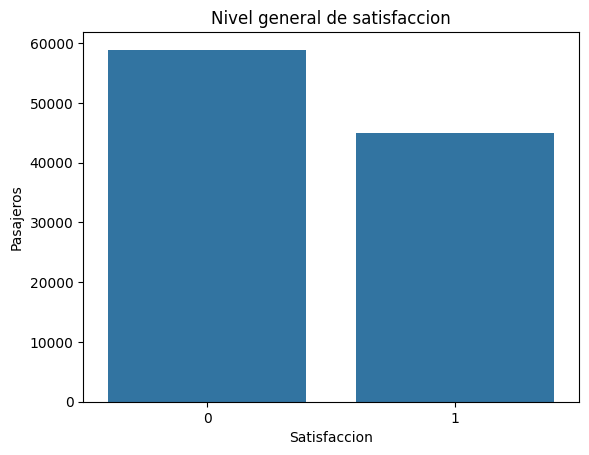

In [5]:
sns.countplot(x='satisfaction', data=df)
plt.title('Nivel general de satisfaccion')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.show()

**¿Cuáles son los porcentajes?**

In [10]:
contador = df['satisfaction'].value_counts(normalize=True) * 100
print(f"Hay {contador[1].round()}% personas satisfechas")
print(f"Hay {contador[0].round()}% personas instatisfechas o neutrales")

Hay 43.0% personas satisfechas
Hay 57.0% personas instatisfechas o neutrales


**¿Cómo varía la satisfacción según el género de los pasajeros?**

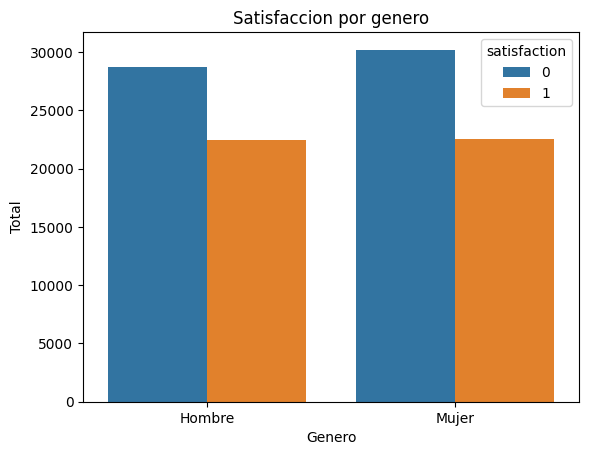

In [14]:
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Satisfaccion por genero')
plt.xlabel('Genero')
plt.ylabel('Total')
plt.xticks([0, 1], ['Hombre', 'Mujer'])
plt.show()

**¿Hay diferencias significativas según el grupo de edad?**

In [38]:
max_age = df['Age'].max()
min_age = df['Age'].min()
segment = ((max_age-min_age)/5).round()


16.0

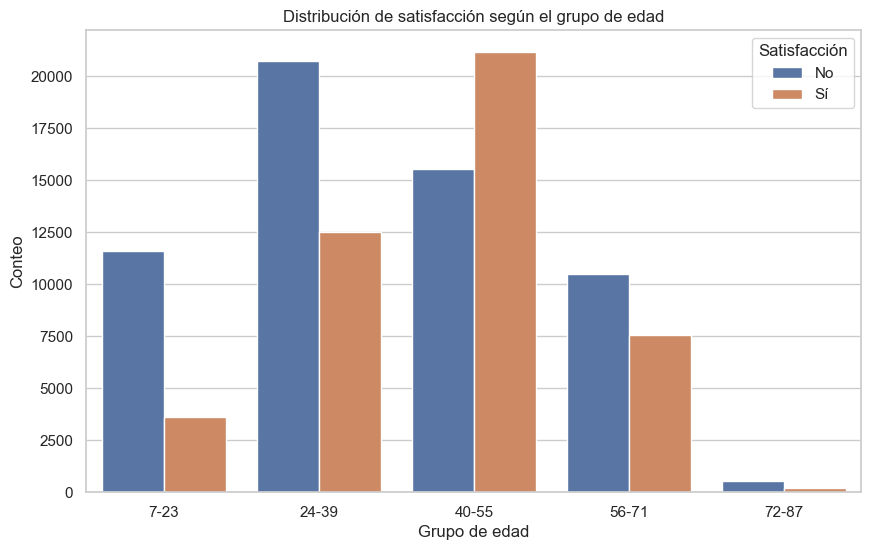

In [42]:
bins = [7, 23, 39, 55, 71, 87]
labels = ['7-23', '24-39', '40-55', '56-71', '72-87']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_group', hue='satisfaction', data=df)
plt.title('Distribución de satisfacción según el grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Conteo')
plt.legend(title='Satisfacción', labels=['No', 'Sí'])
plt.show()

*Si hay una ntable difrencia en especial en el grupo de 40-55 que se ve que tienen mas satisfaccion que otros grupos*

**¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?**

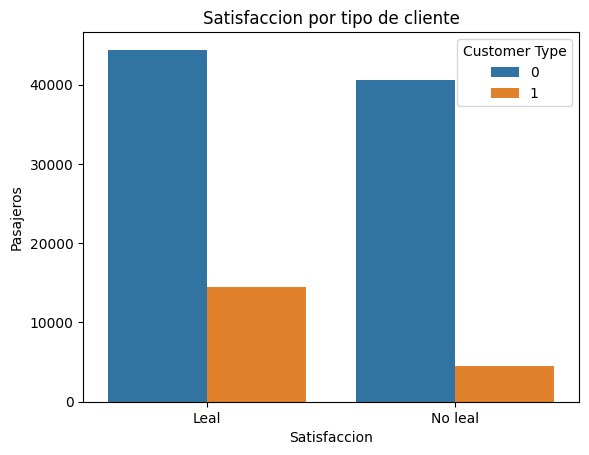

In [23]:
sns.countplot(x='satisfaction', hue='Customer Type', data=df)
plt.title('Satisfaccion por tipo de cliente')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.xticks([0,1], ['Leal','No leal'])
plt.show()

**¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?**

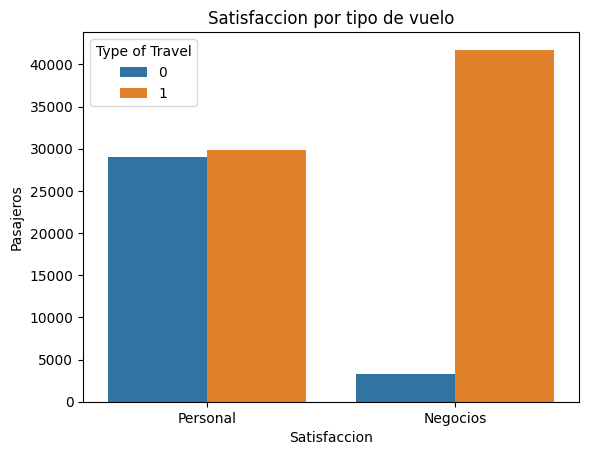

In [25]:
sns.countplot(x='satisfaction', hue='Type of Travel', data=df)
plt.title('Satisfaccion por tipo de vuelo')
plt.xlabel('Satisfaccion')
plt.ylabel('Pasajeros')
plt.xticks([0,1], ['Personal','Negocios'])
plt.show()

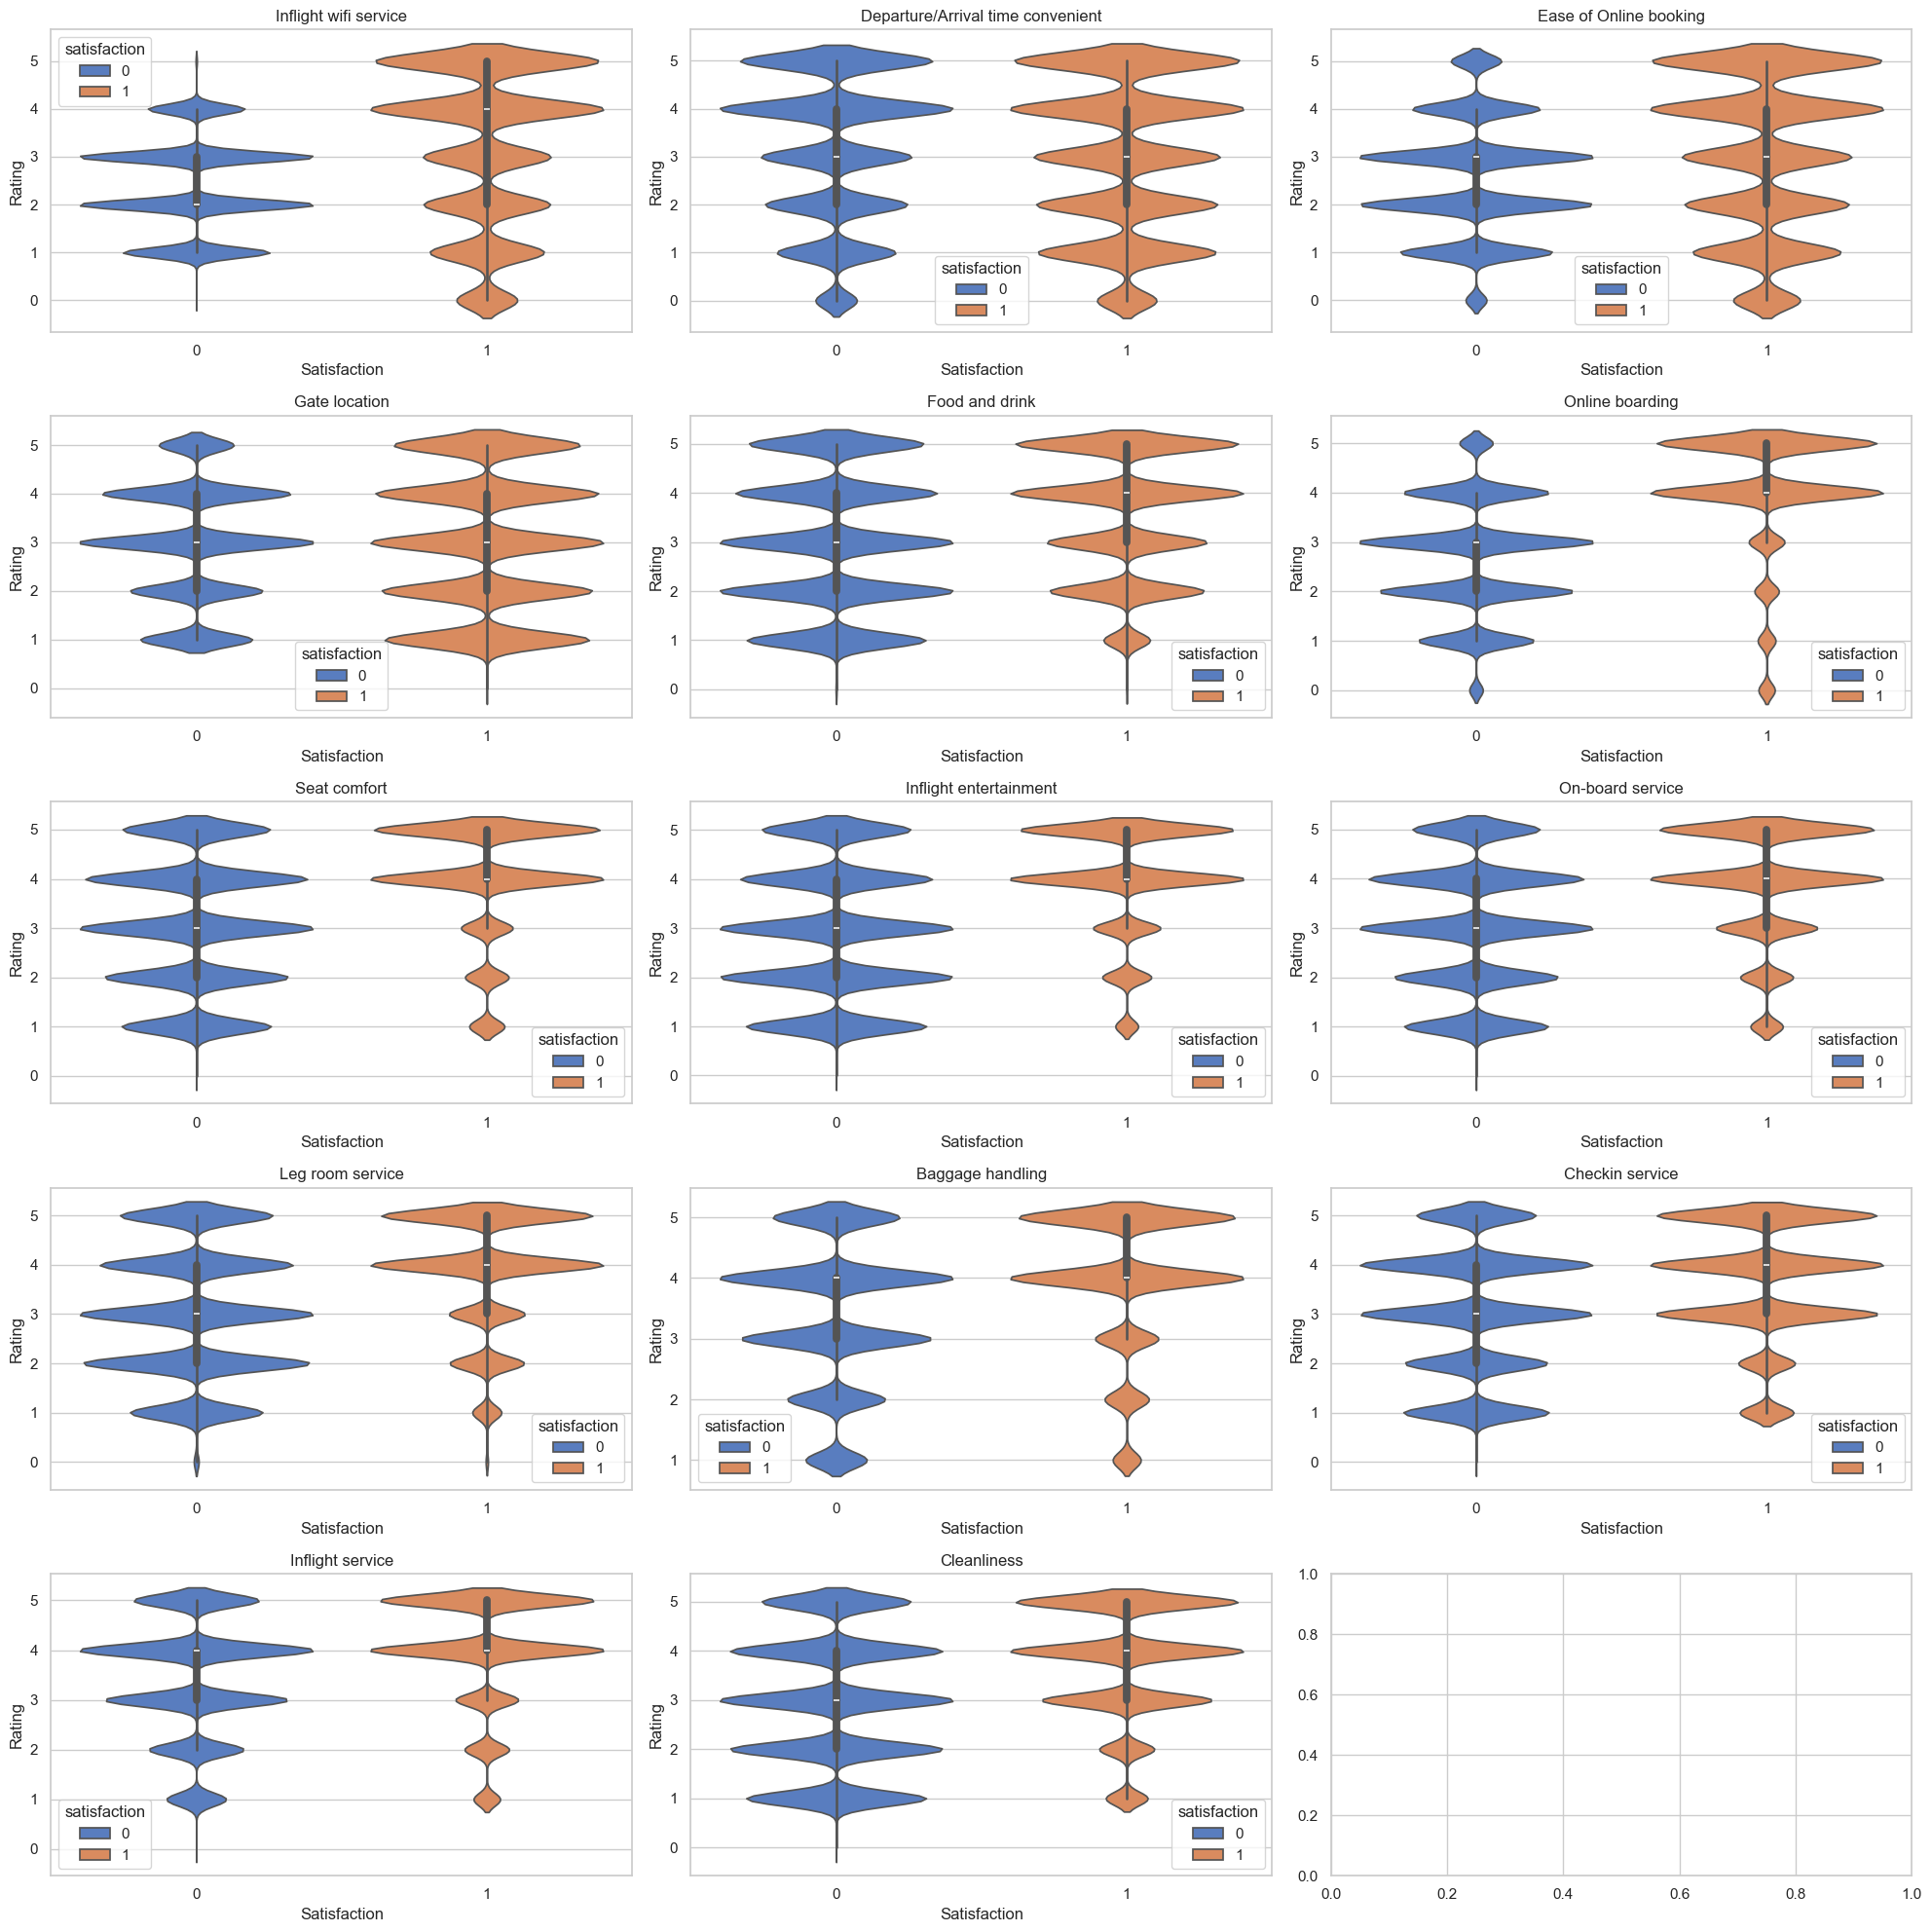

In [30]:
columns_to_analyze = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns_to_analyze):
    sns.violinplot(x='satisfaction', y=column, data=df, ax=axes[i], hue='satisfaction',palette='muted')
    axes[i].set_title(column)
    axes[i].set_xlabel('Satisfaction')
    axes[i].set_ylabel('Rating')
plt.tight_layout()
plt.show()

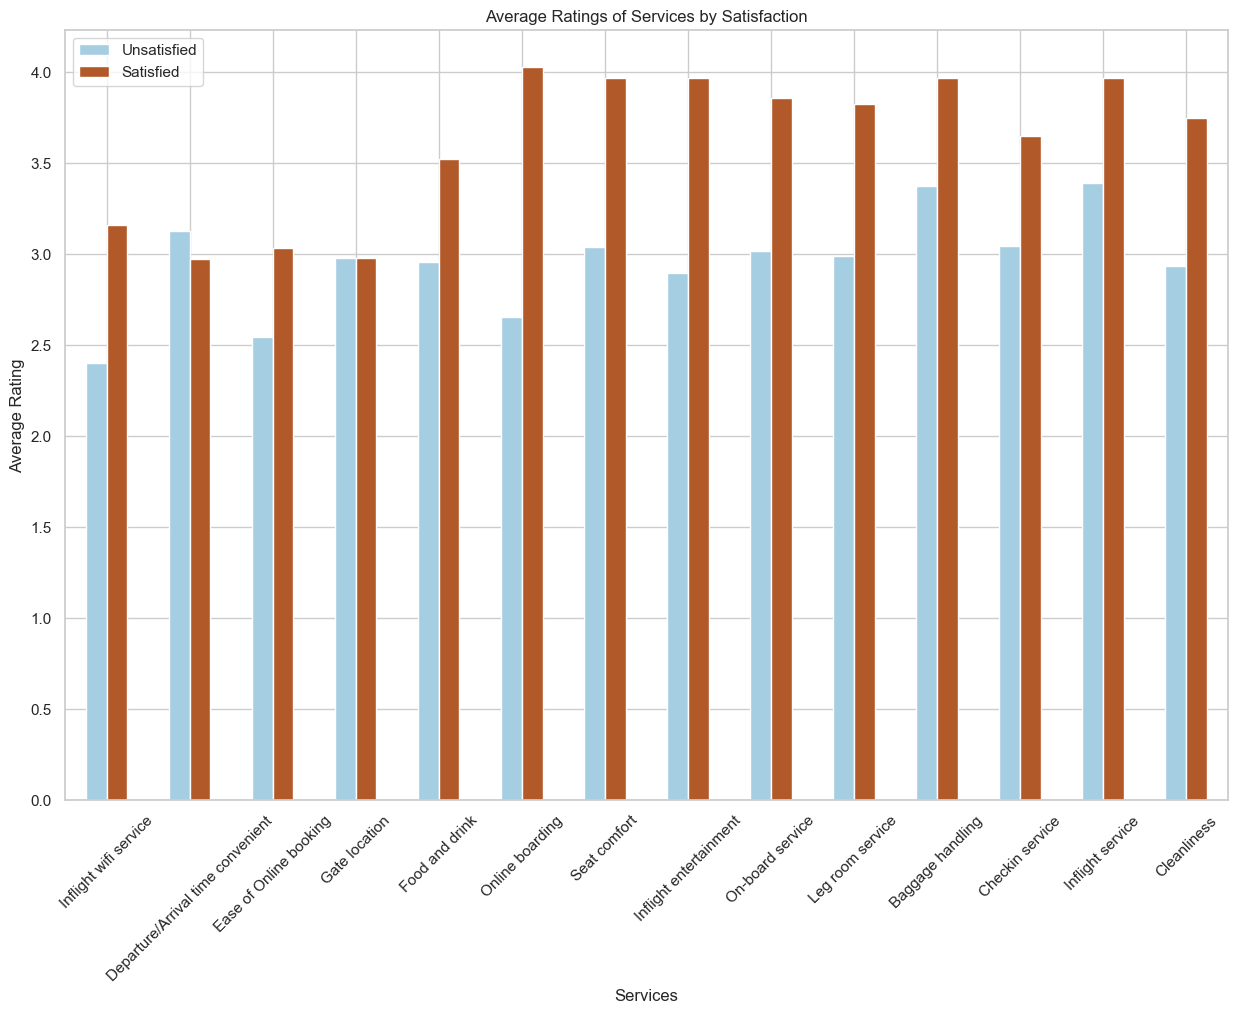

In [31]:
mean_ratings = df.groupby('satisfaction')[columns_to_analyze].mean().T
mean_ratings.columns = ['Unsatisfied', 'Satisfied']
mean_ratings.plot(kind='bar', figsize=(15, 10), colormap='Paired')
plt.title('Average Ratings of Services by Satisfaction')
plt.xlabel('Services')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de Negocios?**

Servicios que más satisfacen a la clase de negocios:
Online boarding           4.131613
Inflight service          4.127494
Baggage handling          4.125986
Seat comfort              4.100725
Inflight entertainment    4.055278
Name: Satisfied, dtype: float64

Servicios que más insatisfacen a la clase de negocios:
Inflight service    3.202173
Baggage handling    3.200132
Seat comfort        2.989134
Gate location       2.978005
Checkin service     2.919921
Name: Unsatisfied, dtype: float64


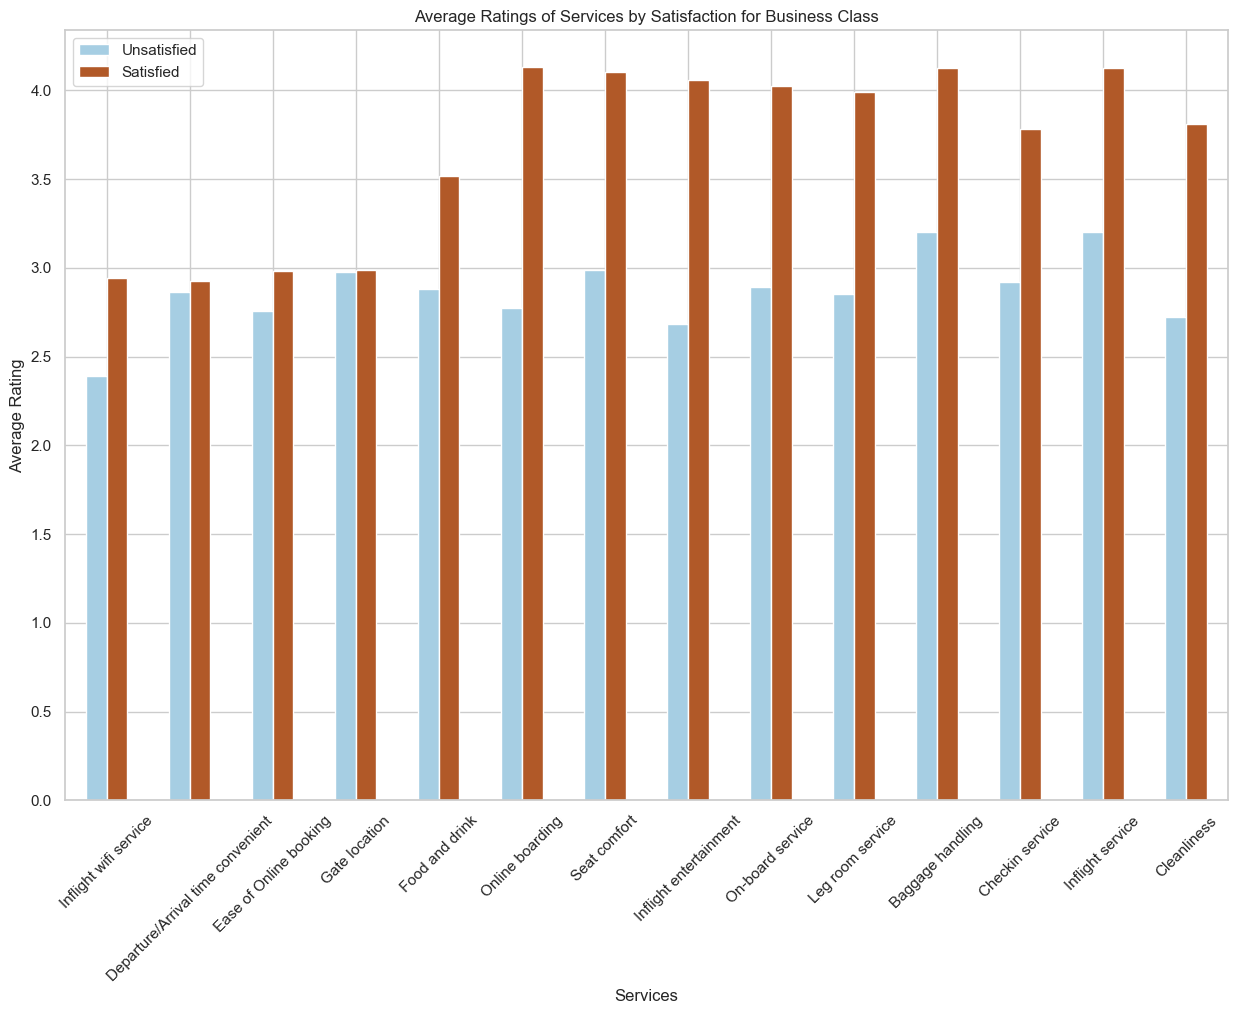

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para la clase de negocios
business_class_data = df[df['Class'] == 0]

# Lista de columnas que queremos analizar
columns_to_analyze = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]
satisfaction_means = business_class_data.groupby('satisfaction')[columns_to_analyze].mean().T
satisfaction_means.columns = ['Unsatisfied', 'Satisfied']
most_satisfying_services = satisfaction_means['Satisfied'].sort_values(ascending=False).head()
most_dissatisfying_services = satisfaction_means['Unsatisfied'].sort_values(ascending=False).head()

print("Servicios que más satisfacen a la clase de negocios:")
print(most_satisfying_services)
print("\nServicios que más insatisfacen a la clase de negocios:")
print(most_dissatisfying_services)

satisfaction_means.plot(kind='bar', figsize=(15, 10), colormap='Paired')
plt.title('Average Ratings of Services by Satisfaction for Business Class')
plt.xlabel('Services')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**¿Cómo afecta el retraso en la salida y llegada la satisfacción del pasajero?, ¿hay una correlación?**

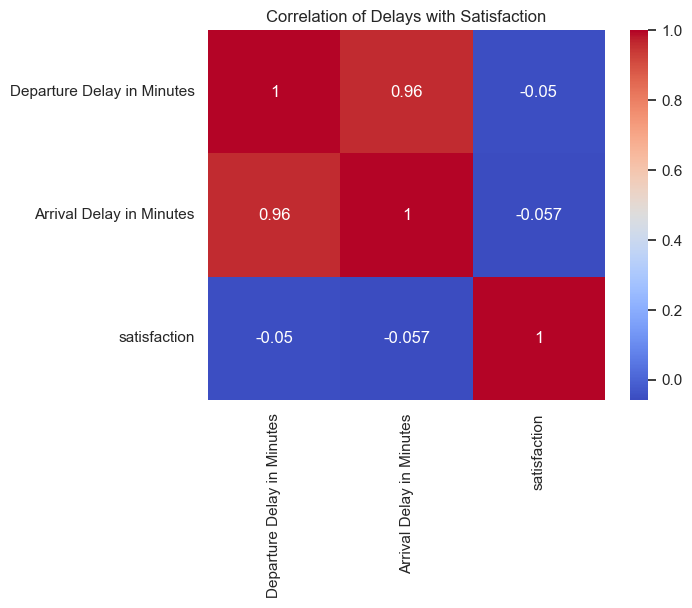

In [47]:
correlation = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Delays with Satisfaction')
plt.show()

**¿Existen correlaciones significativas entre diferentes niveles de satisfacción?**

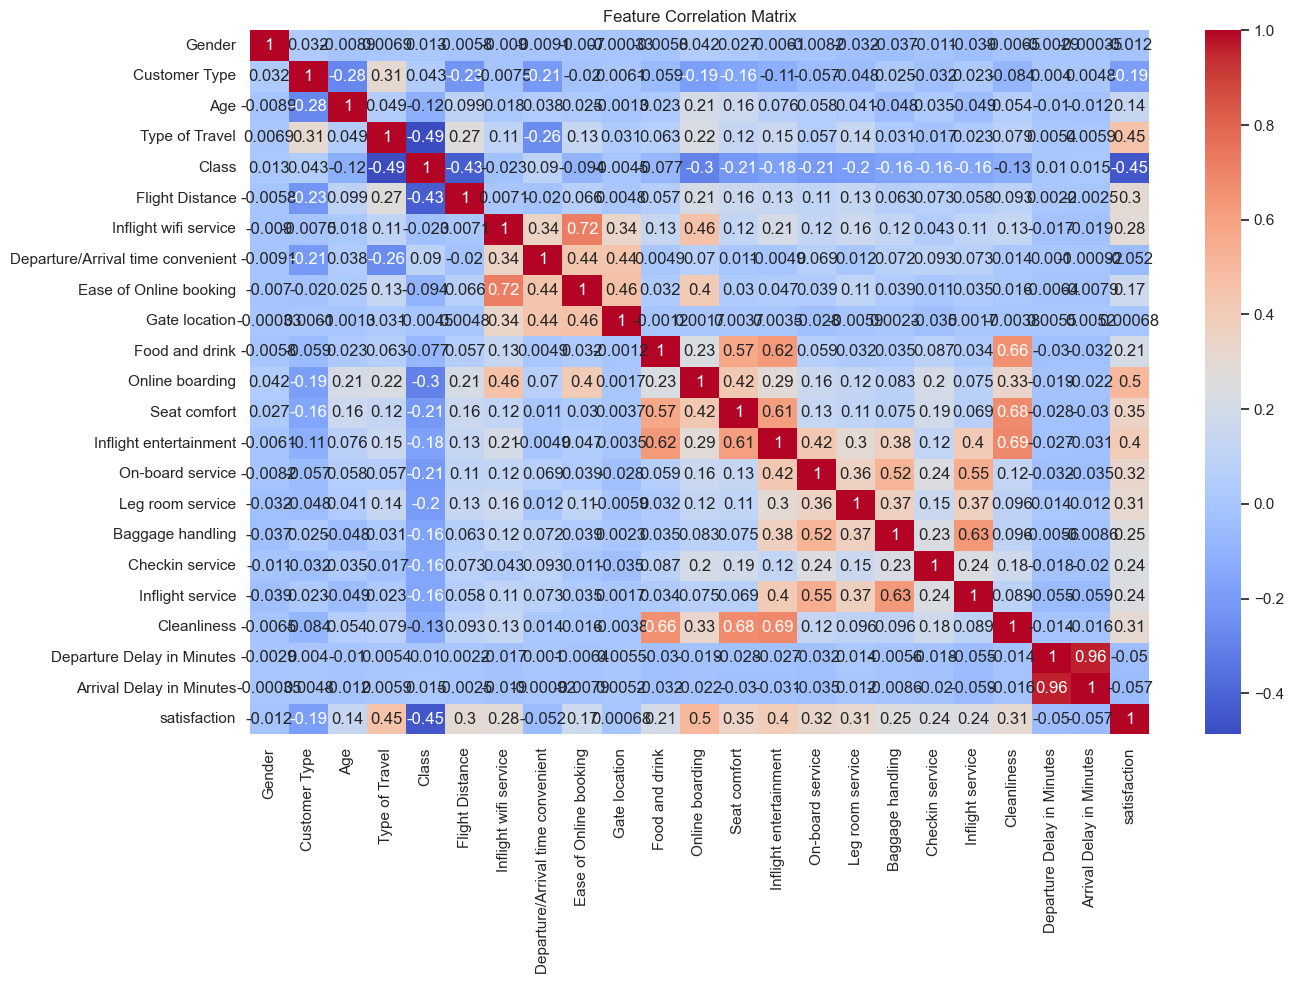

In [51]:
df = df.drop(columns=['Age_group'])
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**¿Qué segmentos de clientes existen en base a demografía, tipo de cliente, tipo de viaje y clase?, ¿cuáles muestran mayores niveles de satisfacción?**

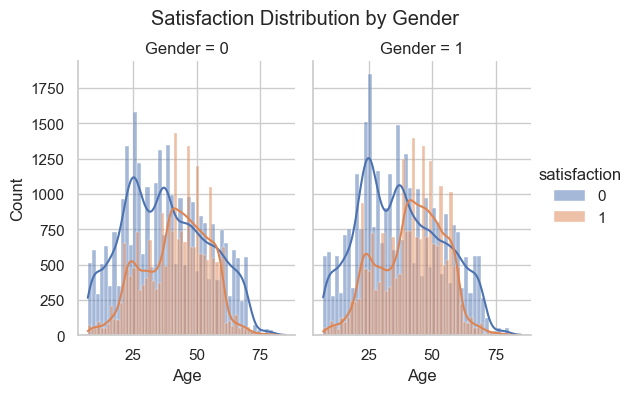

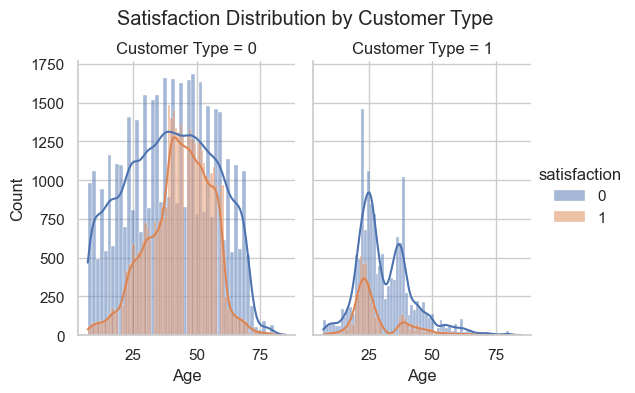

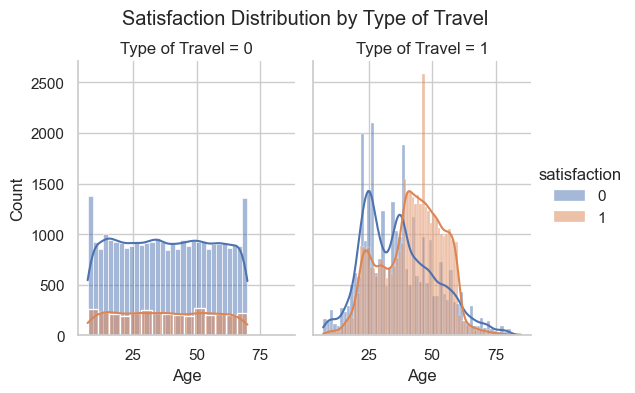

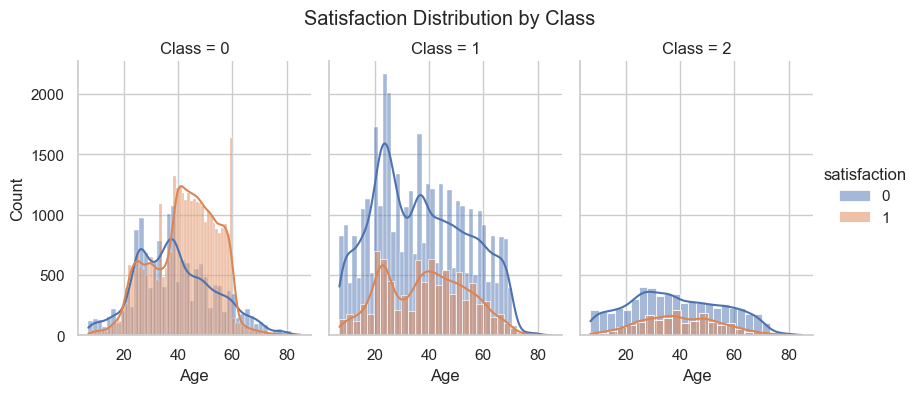

In [52]:
segments = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for segment in segments:
    g = sns.FacetGrid(df, col=segment, hue='satisfaction', height=4, aspect=0.7)
    g.map(sns.histplot, 'Age', kde=True)
    g.add_legend()
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Satisfaction Distribution by {segment}')
    plt.show()